Nama : Irawansyah

Email : irawanchoc@gmail.com

Username : irawansyah

Import library pandas 

In [1]:
import pandas as pd
df= pd.read_csv('amazon_cells_labelled.txt', names=['sentence', 'label'], sep='\t')

Import 1000 sampel dataset

In [2]:
df.head(1000)

,sentence,label
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
...,...,...
995,The screen does get smudged easily because it ...,0
996,What a piece of junk.. I lose more calls on th...,0
997,Item Does Not Match Picture.,0
998,The only thing that disappoint me is the infra...,0


Preprocessing dengan lowercase

In [3]:
df['sentence'] = df['sentence'].str.lower()
df['sentence']

0      so there is no way for me to plug it in here i...
1                            good case, excellent value.
2                                 great for the jawbone.
3      tied to charger for conversations lasting more...
4                                      the mic is great.
                             ...                        
995    the screen does get smudged easily because it ...
996    what a piece of junk.. i lose more calls on th...
997                         item does not match picture.
998    the only thing that disappoint me is the infra...
999    you can not answer calls with the unit, never ...
Name: sentence, Length: 1000, dtype: object

Split data 80% data train dan 20% data test

In [4]:
from sklearn.model_selection import train_test_split
kalimat = df['sentence'].values
y = df['label'].values
kalimat_latih, kalimat_test, y_latih, y_test = train_test_split(kalimat, y, test_size=0.2)

Gunakan fungsi tokenizer pada data latih dan data test. Jangan lupa gunakan fungsi pad_sequences agar setiap sequence sama panjang.

In [5]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words=250, oov_token='x')
tokenizer.fit_on_texts(kalimat_latih) 
tokenizer.fit_on_texts(kalimat_test)
 
sekuens_latih = tokenizer.texts_to_sequences(kalimat_latih)
sekuens_test = tokenizer.texts_to_sequences(kalimat_test)
 
padded_latih = pad_sequences(sekuens_latih) 
padded_test = pad_sequences(sekuens_test)

Untuk arsitektur model kita menggunakan layer Embedding dengan dimensi embedding sebesar 16

In [6]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(250, 16, input_length=20),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [7]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print("\nAkurasi telah mencapai >90%!")
      self.model.stop_training = True
callbacks = myCallback()

Terakhir kita dapat mulai melatih model kita dengan memanggil fungsi fit().

In [8]:
num_epochs = 50
history = model.fit(padded_latih, y_latih, epochs=num_epochs, 
                    validation_data=(padded_test, y_test), verbose=2, callbacks=[callbacks])

Epoch 1/50
25/25 - 3s - loss: 0.6925 - accuracy: 0.5312 - val_loss: 0.6910 - val_accuracy: 0.5650
Epoch 2/50
25/25 - 0s - loss: 0.6866 - accuracy: 0.5938 - val_loss: 0.6797 - val_accuracy: 0.5850
Epoch 3/50
25/25 - 0s - loss: 0.6492 - accuracy: 0.6375 - val_loss: 0.6206 - val_accuracy: 0.6450
Epoch 4/50
25/25 - 0s - loss: 0.5447 - accuracy: 0.7312 - val_loss: 0.5234 - val_accuracy: 0.7450
Epoch 5/50
25/25 - 0s - loss: 0.4477 - accuracy: 0.8062 - val_loss: 0.4998 - val_accuracy: 0.7700
Epoch 6/50
25/25 - 0s - loss: 0.3619 - accuracy: 0.8338 - val_loss: 0.4742 - val_accuracy: 0.7850
Epoch 7/50
25/25 - 0s - loss: 0.3601 - accuracy: 0.8425 - val_loss: 0.4858 - val_accuracy: 0.7750
Epoch 8/50
25/25 - 0s - loss: 0.3238 - accuracy: 0.8575 - val_loss: 0.5171 - val_accuracy: 0.7850
Epoch 9/50
25/25 - 0s - loss: 0.3043 - accuracy: 0.8662 - val_loss: 0.5064 - val_accuracy: 0.7800
Epoch 10/50
25/25 - 0s - loss: 0.2972 - accuracy: 0.8687 - val_loss: 0.5190 - val_accuracy: 0.7600
Epoch 11/50
25/25 -

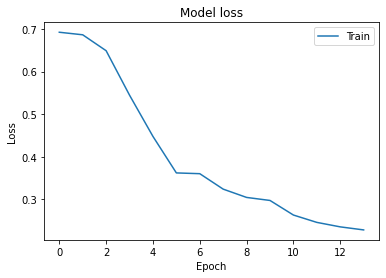

In [11]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

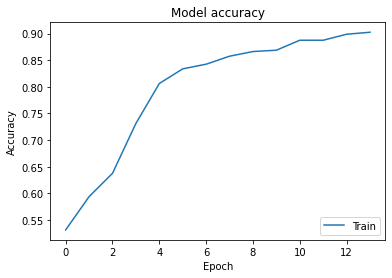

In [13]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='lower right')
plt.show()

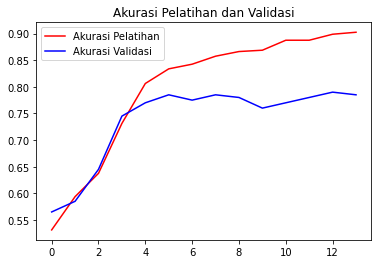

<Figure size 432x288 with 0 Axes>

In [14]:

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Akurasi Pelatihan')
plt.plot(epochs, val_acc, 'b', label='Akurasi Validasi')
plt.title('Akurasi Pelatihan dan Validasi')
plt.legend(loc=0)
plt.figure()


plt.show()